### Student Details

Student Name: Alessandro Gostoli

Student ID: 23251107

# Task 2: Probability Theory

## Option ? (which option did you pick?)

Task 1

For the first task i chose the binomial distribution.

There is a bag which contains 25 balls, 17 of them are red and the others are blue. 

For each experiment we pick a random ball from the bag5 times, putting it bakc inside the bag every time. 

If you pick a blue ball you score 4 points while if you pick a red one you score -1 point. 

Let's calculate the expected value and the standard deviation of the number of blue balls estracted in one experiment and the same values for the scores. 

Let's run the experiment 1000 times.

Task 2

For the task 2 i chose the normal distribution

There is a machine that makes candy and put them in to bags that weight 0.200 kg, which is the expected value. The standard deviation is 0.20 kg. 

Each bag of candies costs 2.0€ but if the actual weight of the bag is less the 0.200 kg you can have a discount.

If the bags weights less or equal to 0.170 kg you will pay 1.0€. 

If the bags weights between 0.171 and 0.190 kg you will pay 1.70€

Otherwise you will pay the right price, 2.0€.

Let's calculate the expected value and the standard deviation for the experiment and compare them to the given ones.

Let's calculate the expected value and the standard deviation for the prices.

Let's buy 20000 bags of candies and see the results


## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations

(Provide details of the manual calculations)

# Task 2

Example 1

 expected value = 4.619 --> real one = 4.705882352941177
 standard deviation = 1.5505622345598524 --> real one = 1.5784009252939692
 expected value scores = 9.476
 standard deviation scores = 6.2022489382394115


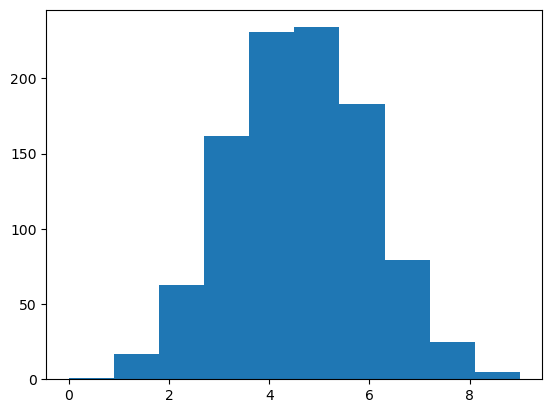

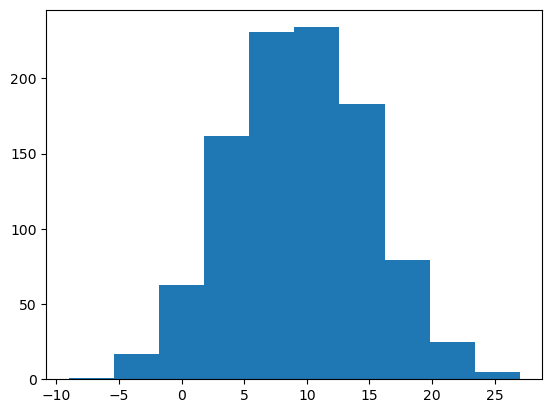

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Defining the function which repeats the experiment x times
def extraction(n, p, x):
    res = np.random.binomial(n, p, x)
    return res

#Sefining function parameters
n_experiments = 1000
p = 8/17
n = 10

#Saving the results in a variable
res = extraction(n, p, n_experiments)

#Defining the variable containing the scores
scores = []

#Defining winning points and the penalty when you pick a ball
win_points = 4
loss_penalty = -1

#Collecting all the scores in the variable 'scores'
for i in res:
    scores.append(i * win_points + (n - 1) * loss_penalty)

#Calculating the expected value and the standard deviation for the experiments
expected_value = sum(res) / n_experiments
standard_deviation = np.sqrt(sum( (i - expected_value)**2 for i in res ) / (n_experiments - 1))

#Calculating the real expected value and standard deviation
real_expected_value = n*p
real_standard_deviation = np.sqrt(n*p*(1-p))

#Calculating the expected value and standard deviation for the scores
expected_value_scores = sum(scores) / n_experiments
standard_deviation_scores = np.sqrt(sum( (i - expected_value_scores)**2 for i in scores ) / (n_experiments - 1))

print(f" expected value = {expected_value} --> real one = {real_expected_value}")
print(f" standard deviation = {standard_deviation} --> real one = {real_standard_deviation}")
print(f" expected value scores = {expected_value_scores}")
print(f" standard deviation scores = {standard_deviation_scores}")

#Plotting the experiments' distribution
plt.hist(res, bins=10)
plt.show()

#Plotting the scores' distribution
plt.hist(scores, bins=10)
plt.show()



Example 2

 Expected value = 0.20003566166016695 --> Real one = 0.2
 Standard deviation = 0.01976790756150917 --> Real one = 0.02
 Expected value prices = 1.8628150000000228
 Standard deviation prices = 0.2595171347563915


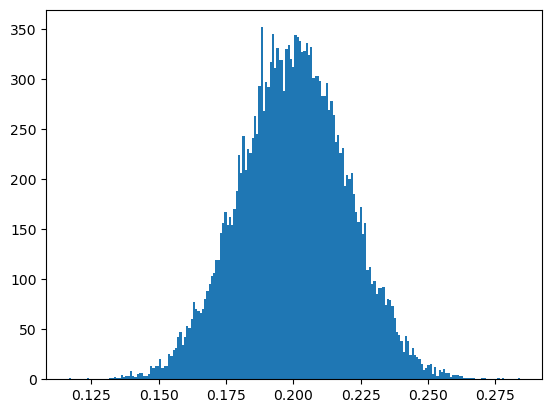

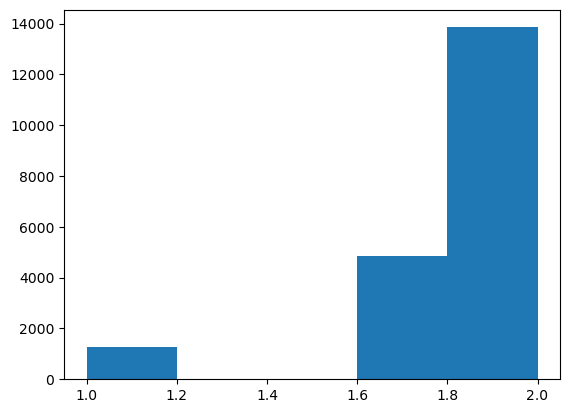

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

#Defining the function the repeat the experiment 'n_experiments' times
def experiment(mu, sigma, n_experiments):
    res = np.random.normal(mu, sigma, n_experiments)
    return res

#Defining the mean, standard deviation and the times the experiment will be repeated
n_experiments = 20000
mu, sigma = 0.2, 0.02 

#Saving the values of all the experiments
res = experiment(mu, sigma, n_experiments)

#Defining the variable that stores the prices
prices = []

##Defining the prices options
full_price = 2.0            #more than 0.190 kg
little_discount = 1.7       #between 0.171 and 0.190 kg
big_discount = 1.0          #less then 0.170 kg

#Collecting all the prices 
for i in res:
    price = full_price
    if(i <= 0.170):
        price = big_discount
    elif(i <= 0.190):
        price = little_discount
    prices.append(price)

#Calculating the expected value and the standard deviation of the weights of the bags
expected_value = sum(res) / n_experiments
standard_deviation = np.sqrt(sum( (i - expected_value)**2 for i in res ) / (n_experiments - 1))

#Calculating the expected value and the standard deviation of the prices
expected_value_prices = sum(prices) / n_experiments
standard_deviation_prices = np.sqrt(sum( (i - expected_value_prices)**2 for i in prices ) / (n_experiments - 1))

print(f" Expected value = {expected_value} --> Real one = {mu}")
print(f" Standard deviation = {standard_deviation} --> Real one = {sigma}")
print(f" Expected value prices = {expected_value_prices}")
print(f" Standard deviation prices = {standard_deviation_prices}")

#Plotting the weights distribution
plt.hist(res, bins=200)
plt.show()

#Plotting the prices distribution
plt.hist(prices, bins=5)
plt.show()



# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [12]:
# import dependencies
import numpy as np
import pandas
from sklearn.model_selection import train_test_split 


# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

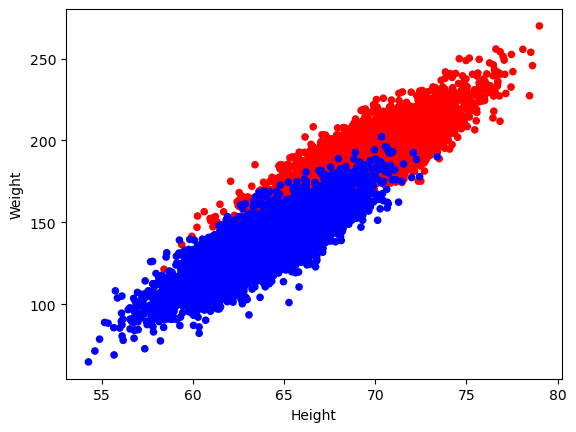

In [13]:
colors ={"Male" : "red", "Female" : "blue"}

data.plot(kind='scatter',x="Height",y="Weight",c=data.Gender.map(colors));

###### Discuss: Do you think there is resonable separation?

I think there is a reasonable separation. We can clearly see that there is a sort of line dividing the male cluster and female cluster. We can see that males tend to be taller and heavier than females. In fact the two cluster have an area where they overlap but there is no female taller than 74 inches and heavier than 200 pounds

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [14]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [15]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [16]:
from sklearn.naive_bayes import GaussianNB

gender_model = GaussianNB().fit(X_train, y_train)

### Test the algorithm
Using the test data

In [17]:
from sklearn.metrics import accuracy_score

y_pred = gender_model.predict(X_test)

print(X_test)
print("")
print(y_pred)
print(y_test.values)

accuracy =  accuracy_score(y_test, y_pred)

print(f"Accuracy = {accuracy}")


         Height      Weight
4924  67.071660  164.806606
7273  61.811388  127.248293
3280  70.427603  174.046351
8554  60.921791  131.253738
7638  61.699330  121.053641
...         ...         ...
9619  64.507140  141.552481
8     67.018950  175.929440
970   67.748990  169.740272
5990  66.700075  135.856008
239   69.167836  187.022420

[3300 rows x 2 columns]

['Male' 'Female' 'Male' ... 'Male' 'Female' 'Male']
['Male' 'Female' 'Male' ... 'Male' 'Female' 'Male']
Accuracy = 0.8954545454545455


### Plot the random samples

In order to create some real random examples of people, i think i should consider the ratio between the heights and the weights in males and females. That's because it can be that the shortest person is also the heaviest and the data that we already have show this in the plot: the trend is that when the height grow the weight follows. I'm also want to find the maximum and minimum weight and height in both the males and the females in other to do not overcome them when creating random samples.

<AxesSubplot: xlabel='Height', ylabel='Weight'>

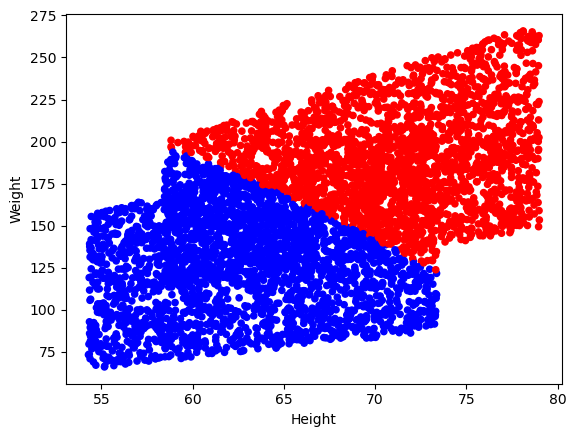

In [18]:
#Defining the variables regarding males and females weights and heights
male_ratios = []
female_ratios = []

max_weight_male = 0
max_weight_female = 0
min_weight_male = 250       # I selected a really high weight because i can't use 0 since nobody can weight less then 0
min_weight_female = 250     # I selected a really high weight because i can't use 0 since nobody can weight less then 0

max_height_male = 0
max_height_female = 0
min_height_male = 75        # I selected a really high height because i can't use 0 since nobody is less tall then 0
min_height_female = 75      # I selected a really high height because i can't use 0 since nobody is less tall then 0




#Calculating the ratio for males and females
for i in range(len(data)):
    ratio = data.Height[i] / data.Weight[i] 
    if(data.Gender[i] == "Male"):
        male_ratios.append(ratio)
    else:
        female_ratios.append(ratio)


#Calculating the maximum and minimum ratios in males and females, in order to stay
# in those ranges when creating a new person
max_male_ratio = max(male_ratios)
max_female_ratio = max(female_ratios)
min_male_ratio = min(male_ratios)
min_female_ratio = min(female_ratios)


#Calculating the maximum and minimum height and weight in both males and females
for i in range(len(data)):
    if (data.Gender[i] == "Male"):
        if(data.Height[i] > max_height_male):
            max_height_male = data.Height[i]
        elif(data.Height[i] < min_height_male):
            min_height_male = data.Height[i]

        if(data.Weight[i] > max_weight_male):
            max_weight_male = data.Weight[i]
        elif(data.Weight[i] < min_weight_male):
            min_weight_male = data.Weight[i]
    else:
        if(data.Height[i] > max_height_female):
            max_height_female = data.Height[i]
        elif(data.Height[i] < min_height_female):
            min_height_female = data.Height[i]

        if(data.Weight[i] > max_weight_female):
            max_weight_female = data.Weight[i]
        elif(data.Weight[i] < min_weight_female):
            min_weight_female = data.Weight[i]



#Defining the number of people that i need to create, the iteration variable i
#  and the vectors where to save new people's heights and weights
n_times = 5000
i = 0
people_heights = []
people_weights = []

#Creating half males and half females following the correct ratios and without going off the 
# heights' and weights' maximum and minimum.
while(i < n_times):        #males
    if(i < n_times / 2):

        height = rnd.uniform(min_height_male, max_height_male)
        weight = rnd.uniform(min_weight_male, max_weight_male)
        ratio = height / weight
        if(ratio < max_male_ratio and ratio > min_male_ratio):
            people_heights.append(height)
            people_weights.append(weight)
            i +=1

    else:        #female
        height = rnd.uniform(min_height_female, max_height_female)
        weight = rnd.uniform(min_weight_female, max_weight_female)
        ratio = height / weight
        if(ratio < max_female_ratio and ratio > min_female_ratio):
            people_heights.append(height)
            people_weights.append(weight)
            i +=1


 
#Defining a new dataframe with the new people
df = pd.DataFrame(list(zip(people_heights, people_weights)),
               columns =['Height', 'Weight'])

#Predict the gender 
y_pred = gender_model.predict(df)

df['Gender'] = y_pred

#Plot the data
df.plot(kind='scatter',x="Height",y="Weight",c=df.Gender.map(colors))

## Task 4

ML OVERVIEW

Machine learning can be divided into 3 main subfields, super­vised learning, unsupervised learning and reinforcement learning. Each one of them has different characteristics which make it more suitable for specific purposes. Supervised learning is mostly used for classification and regression since the model learns by looking at the outputs that are known, and trying to map these outputs to the inputs. Unsupervised learning on the other hand looks at the input and tries to distinguish some patterns in the data, dividing them into clusters. This method is useful when it comes to identifying which differences and similarities there are in the input data.

RL OVERVIEW

Reinforcement learning differs from the previous methods in that it uses rewards to make an agent learn how to behave in a certain environment. The agent tries all the possible choices in the policy that it can do in the environment to achieve a certain task. Reinforcement learning is widely used to make machines learn to behave like humans and perform tasks that a person can do.

RL EXPLANATION

The agent will be rewarded every time it achieves the task. But usually, this is not enough to make it perform well. In some cases, the space of possible choices is too wide and it never reaches the goal. To fix this problem, little positive rewards are provided when the agent gets nearer to the final goal. Negative rewards are used as well to make it avoid undesired behavior such as going off the road for a self-driving car or losing your life in a game. The rewards are calculated by a reward function/reward signal that is unique for each task and cannot be reused for other tasks. Although the reward function tells how good was the last choice, to reach the final goal is often better to follow a strategy. The "value function" is what says how near you are to the final goal and how well are you performing concerning the task and time. This mechanism prevents the agents from collecting tons of positive rewards never completing the task. Some methods known as "model-based" uses also a system called "model" to forecast the future states and their reward instead of choosing randomly and learning from errors.

WHY USE REINFORCEMENT LEARNING

Since reinforcement learning starts exploring the environment without any previous knowledge and learns by rewards and punishments, it becomes really useful when you are facing unforeseen scenarios. The space of the states that an environment can present could be really difficult to represent with static data. In some cases, you face a scenario that changes a lot depending on the agent's choices, or maybe the space of the states is impossible to represent with fixed data, due to the infinite number of circumstances or their complexity. Reinforcement learning performs well in those examples, as opposed to the other two. The trade-off between trying to find new paths to the final goal and predicting the right behavior from past knowledge is the biggest challenge in reinforcement learning.

DYNAMIC TREATMENT REGIMENS (DTRs)

RL is widely used in many aspects of healthcare, such as "Dynamic Treatment Regimens"."A dynamic treatment regime is a sequence of decision rules, one per treatment decision, that provides the mechanism by which patient's values on key characteristics, called tailoring variables are translated into dosage amount and type.” [https://people.seas.harvard.edu/~samurphy/papers/DTRbookchapter.pdf]

DTRs can be built through the Sequential Multiple Assignment Randomized Trial (SMART) method. In these methods, the patients are randomized and given a certain treatment. At each stage depending on the results of the treatment the patients are re-randomized and given other therapies. In this way it's possible to understand the right way to cure patients, looking at the different results. This is exactly how reinforcement learning works. One of the best ways to find good DTRs is using Q-learning.

Q LEARNING

Q-learning is a technique that finds the best actions' policy using a Q function. In this method, each state has a Q value that represents the quality of the action chosen from the previous state. That value is provided by the Q function that takes into account the immediate reward that a selected state can give and the maximum future rewards that is collectable from the selected state onward. In the beginning, the Q values are initialized randomly. Once the agent starts making actions and getting rewards, it will update the Q values, until the Q values lead the the agent to the optimal solution. In Q learning sometimes the agent will also make a random decision instead of following the q values to explore the environment. The more the agent understands how the environment is the less it will explore because it should be more confident with the knowledge already gained.

WHY DTR NEEDS RL

Reinforcement learning, and more specifically Q-learning perfectly suits the task of finding the best path to cure a patient, since it can adapt its behavior to the environment's changing and learn from past observations. These tasks can't be faced with supervised learning or unsupervised learning. It is impossible to represent all the possible combinations of the actions and organize them in features, predict the achievement of the task. Moreover, in this problem, it's unknown the space of the state of the environment, since we don't know how patients can react to the treatments. Take makes the environment very dynamic and even more challenging to use other methods than RL to face this problem

Sources used :
https://www.youtube.com/watch?v=aCEvtRtNO-M

https://www.youtube.com/watch?v=qhRNvCVVJaA

https://www.youtube.com/watch?v=1FZ0A1QCMWc&t=124s

https://www.youtube.com/watch?v=JgvyzIkgxF0&t=104s

https://www.sciencedirect.com/science/article/pii/S093336572031229X#bib0280

https://medium.com/@BonsaiAI/why-reinforcement-learning-might-be-the-best-ai-technique-for-complex-industrial-systems-fde8b0ebd5fb
